# Statistics Coding Challenge #1

In this coding challenge, we are going to use the "Accidental Drug Related Deaths 2012-2017 (State of Connecticut)" data set available from the Data.Gov website (https://catalog.data.gov/dataset?groups=local&organization_type=State+Government#topic=local_navigation). 

There are 2 main objectives you need to accomplish:

1) First treat missing values for the "Death City" attribute - replace any missing values in the "Death City" with the city that has experienced the most number of deaths

For each city, do the following:

2) Compute summary statistics for the *age* attribute:


a) Mean

b) Median

c) 25%, 50% and 75% percentiles using [np.percentile](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.percentile.html)

d) Examine any outliers in data using [Boxplots](https://matplotlib.org/2.1.1/gallery/statistics/boxplot_demo.html)

e) Construct a Bee Swarm plot to highlight the distibution of age by each city using [seaborn.swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html)




In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import warnings

def fxn():
    warnings.warn("runtime", RuntimeWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

## Treat Missing City Values

In [0]:
data = pd.read_csv('https://data.ct.gov/api/views/rybz-nyjw/rows.csv?')

In [5]:
data.head()

,CaseNumber,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,...,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc
0,14-9876,06/28/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"CT\n(41.544654, -72.651713)"
1,12-16897,11/30/2012,Male,White,45.0,NaN,NaN,NaN,NEW HAVEN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW HAVEN, CT\n(41.308252, -72.924161)"
2,13-11849,08/12/2013,Male,White,30.0,NEW HAVEN,NaN,NaN,NEW HAVEN,NaN,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW HAVEN, CT\n(41.308252, -72.924161)"
3,14-17578,11/23/2014,Male,White,27.0,NAUGATUCK,NaN,NaN,NEW MILFORD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW MILFORD, CT\n(41.576633, -73.408713)"
4,12-11497,08/14/2012,Male,White,21.0,ENFIELD,NaN,NaN,ENFIELD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"ENFIELD, CT\n(41.976501, -72.591985)"


In [6]:
data['Death City'] = data['Death City'].fillna(data['Death City'].mode())
data.head()

,CaseNumber,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,...,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc
0,14-9876,06/28/2014,NaN,NaN,NaN,NaN,NaN,NaN,HARTFORD,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"CT\n(41.544654, -72.651713)"
1,12-16897,11/30/2012,Male,White,45.0,NaN,NaN,NaN,NEW HAVEN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW HAVEN, CT\n(41.308252, -72.924161)"
2,13-11849,08/12/2013,Male,White,30.0,NEW HAVEN,NaN,NaN,NEW HAVEN,NaN,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW HAVEN, CT\n(41.308252, -72.924161)"
3,14-17578,11/23/2014,Male,White,27.0,NAUGATUCK,NaN,NaN,NEW MILFORD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW MILFORD, CT\n(41.576633, -73.408713)"
4,12-11497,08/14/2012,Male,White,21.0,ENFIELD,NaN,NaN,ENFIELD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"ENFIELD, CT\n(41.976501, -72.591985)"


## Summary Statistics for Age, Grouped By City

In [0]:
grouped = data.groupby('Death City')['Age']

In [8]:
mean = grouped.mean()
median = grouped.median()

quartile_1 = grouped.apply(np.percentile, 25)
quartile_2 = grouped.apply(np.percentile, 50)
quartile_3 = grouped.apply(np.percentile, 75)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [0]:
summary = pd.concat([mean, median, quartile_1, quartile_2, quartile_3], axis=1)
summary.columns = ['Mean Age', 'Median', '25th Percentile', '50th Percentile', '75th Percentile']

In [10]:
summary.head(10)

,Mean Age,Median,25th Percentile,50th Percentile,75th Percentile
Death City,,,,,
6340,51.00,51.0,51.00,51.0,51.00
AMSTON,32.00,32.0,32.00,32.0,32.00
ANDOVER,41.50,41.5,37.75,41.5,45.25
ANSONIA,41.75,42.5,32.25,42.5,51.50
ASHFORD,34.80,31.0,30.00,31.0,36.00
AVON,30.40,35.0,25.00,35.0,36.00
BAKERSVILLE,31.00,31.0,31.00,31.0,31.00
BALTIC,28.00,28.0,27.00,28.0,29.00
BARKHAMSTED,28.00,28.0,28.00,28.0,28.00


## Boxplots

In [11]:
print(len(grouped))

206


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1856: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1863: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1871: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


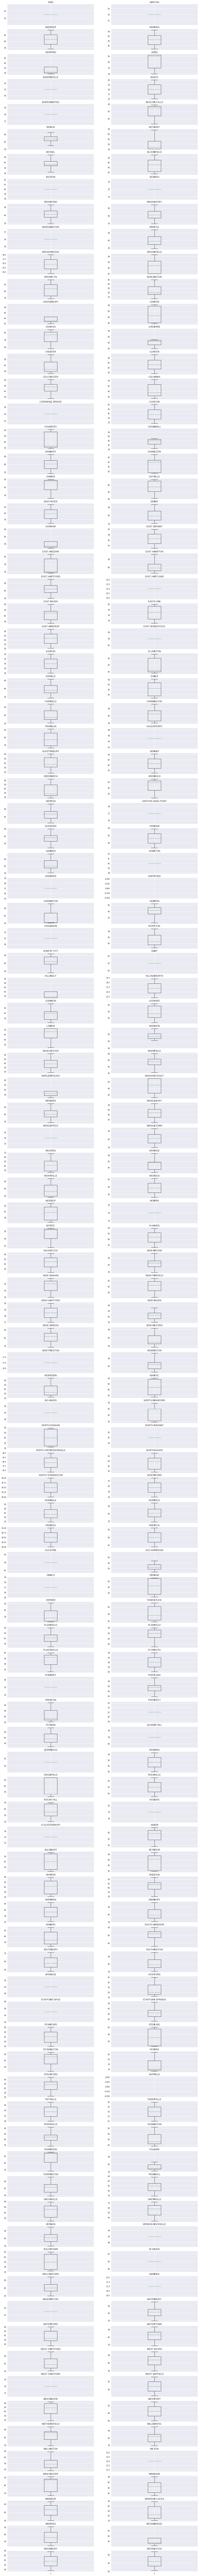

In [12]:
fig, axs = plt.subplots(103, 2, figsize=(18, 250))

for ix, d in enumerate(grouped):
    subx = ix // 2
    suby = ix % 2
        
    axs[subx, suby].boxplot(d[1])
    axs[subx, suby].set_title(d[0])

## Swarm Plots

In [0]:
bigcities = data['Death City'].value_counts().sort_values(ascending=False).head(30).index.tolist()
important = data[data['Death City'].isin(bigcities)]

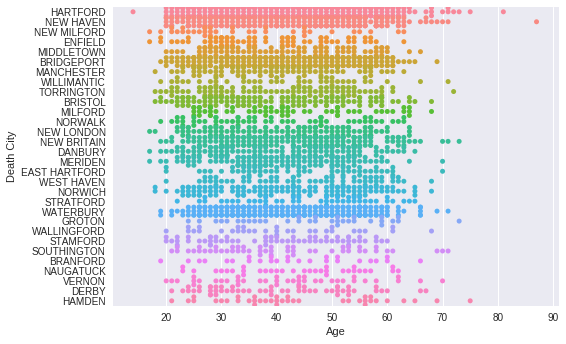

In [24]:
ax = sns.swarmplot(x=important['Age'], y=important['Death City'])

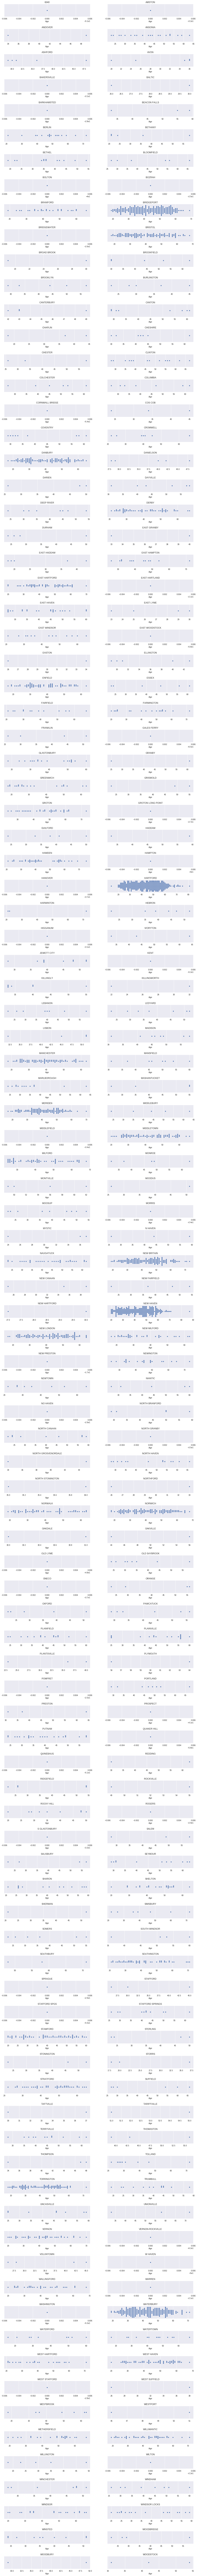

In [14]:
fig, axs = plt.subplots(103, 2, figsize=(18, 250))
fig.subplots_adjust(hspace=1)

for ix, d in enumerate(grouped):
    subx = ix // 2
    suby = ix % 2
    
    sns.swarmplot(x=d[1], ax=axs[subx, suby])
    axs[subx, suby].set_title(d[0])